In [ ]:
# Импорт библиотек

In [88]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('pokemons.csv')

In [4]:
# Заголовки
df.head()

,Number,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.shape

(893, 13)

In [5]:
# Отделение целевого признака
y = df['HP']
X = df[[x for x in df if x not in ('HP', 'Name', 'Type1','Type2', 'Number', 'Total')]]

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

In [ ]:
# Линейнай  регрессия 

In [6]:
%%time
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
CPU times: user 1.87 ms, sys: 4.58 ms, total: 6.45 ms
Wall time: 9.11 ms


In [7]:
# среднеквадратичные ошибки линейной регрессии 
print("Mean squared error (train): %.10f" % mean_squared_error(y_train, linreg.predict(X_train_scaled)))

Mean squared error (train): 491.5137723968


In [8]:
linreg_coef = pd.DataFrame(
    {
        'feature': X.columns,
        'coef': linreg.coef_
    })
linreg_coef.sort_values(by='coef', ascending=False)

# Основной признак покемона -- сила атаки

,feature,coef
0,Attack,10.846951
3,SpecialDef,7.741876
2,SpecialAtk,3.807884
6,Legendary,1.273038
5,Generation,0.261785
4,Speed,-3.697566
1,Defense,-4.389962


In [ ]:
линейная  регререссия с ограничениями(lasso)
2 boxplot распределение атак для типов -- не получится посчитать, потому что в данном дата сете атака 
    является суммарной  характеристикой связки типов
RandomForest по легендарности
boxplot по всем признакам без разбиения на классы

In [9]:
%%time

# Lasso-регрессия

lasso1 = Lasso(alpha=0.01, random_state=17)
lasso1.fit(X_train_scaled, y_train)
print(lasso1)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=17,
   selection='cyclic', tol=0.0001, warm_start=False)
CPU times: user 1.14 ms, sys: 4.36 ms, total: 5.5 ms
Wall time: 5.11 ms


In [10]:
lasso1_coef = pd.DataFrame(
     {
         'feature': X.columns,
         'coef': abs(lasso1.coef_)
     })
lasso1_coef.sort_values(by='coef', ascending=False)

# аналогично линейной регрессии Attack

,feature,coef
0,Attack,10.817257
3,SpecialDef,7.715150
1,Defense,4.348705
2,SpecialAtk,3.802685
4,Speed,3.664819
6,Legendary,1.263501
5,Generation,0.253216


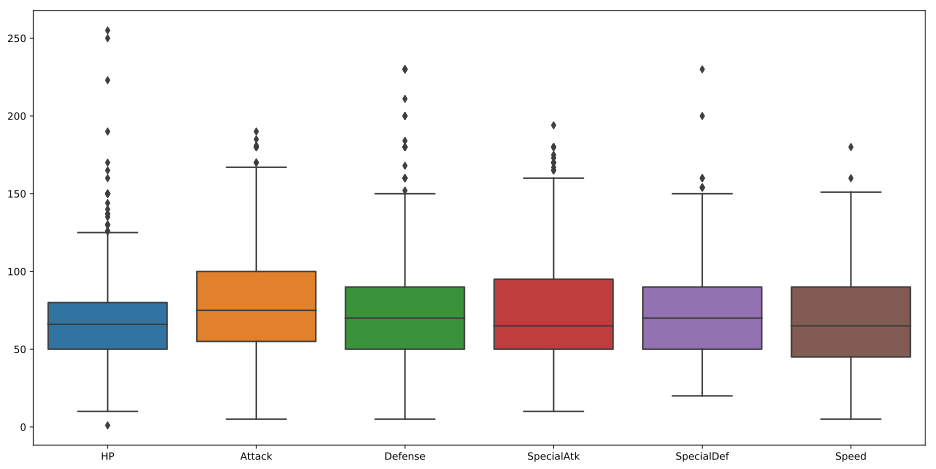

In [93]:
# Графики по всем числовым признакам без разбиения на классы
plt.figure(figsize=(16,8))
without_clases = df[[x for x in df if x not in ('Name', 'Type1','Type2', 'Number', 'Total', 'Legendary', 'Generation')]]
sns.boxplot(data=without_clases);
plt.show()

<Figure size 864x432 with 0 Axes>

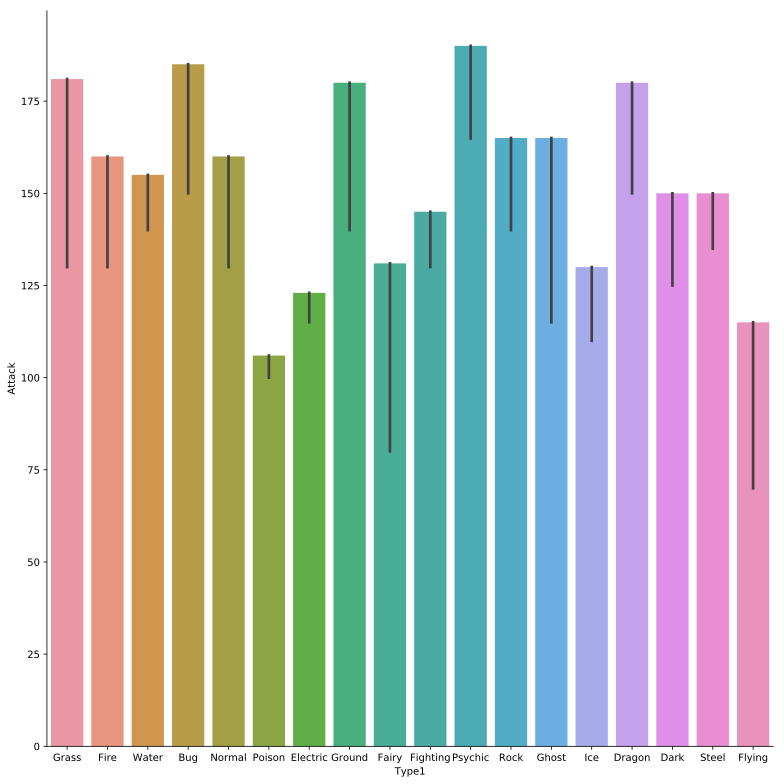

163    Лучшая  атакующая  связка: Psychic + Fighting
dtype: object


In [104]:
# Зато можно показать какая связка наиболее выгодная с точки зрения  атаки
plt.figure(figsize=(12,6))
attack = df[[x for x in df if x not in ('Number', 'Total', 'Legendary', 'Genaration')]]
sns.catplot(x="Type1", y="Attack", data=attack, kind='bar', height=11, estimator=np.max);
plt.show()

# К сожалению вывести нормально не получается, тк ось  не читаемой получается. Поэтому  на графике за X
# берется часть связки, а ниже вычисления максимальной  атаки и связки
max_attack = attack[attack['Attack'] == max(attack['Attack'])]
result = max_attack.head()['Type1'] + ' + ' + max_attack.head()['Type2']
print('Лучшая  атакующая  связка: ' + result)

In [106]:
# Random Forest
y = df['Legendary']
X = df[[x for x in df if x not in ('Name', 'Type1','Type2', 'Number', 'Total', 'Legendary')]]

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

forest = RandomForestRegressor(random_state=17)
forest.fit(X_train_scaled, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [108]:
rf = RandomForestRegressor(max_depth=19, max_features=7, min_samples_leaf=1, random_state=17)
rf.fit(X_train_scaled, y_train) 
print(rf)

rf_importance = pd.DataFrame({
        'feature': X.columns,
        'coef': rf.feature_importances_
    })
rf_importance.sort_values(by='coef', ascending=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=17,
           verbose=0, warm_start=False)


,feature,coef
3,SpecialAtk,0.236211
5,Speed,0.173190
1,Attack,0.168396
4,SpecialDef,0.144515
2,Defense,0.116739
0,HP,0.111226
6,Generation,0.049723
